# Mapping Diversity
## Generating a diversity map in NYC
This notebook will provide step-by-step guide on how to generate a diversity map based on a New York commuter database created by the NYC Planning department for the project NYC Metro Region (https://metroexplorer.planning.nyc.gov/about). 

The purpose of this notebook is to serve as a replicable blueprint for the future diversity maps based on open source big data.

## Import the libraries

Before you start running the rest of the code it is sportant to import the following libraries. The geopandas library is very important if you want to work with data which is bound to geographical location. It is sometimes hard to install it, therefore I included a useful link in the main github page.

In [8]:
#1 Import libraries

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importing the data

The Second step is to import the data. The data can be downloaded from the above mentioned website under Get the Data... Census Tract 2010.
The data is saved as a shp file so it is necessary to use the read file function from the geopandas library.

In [9]:
#2 Import data

d_2010 = gpd.read_file('region_2010.shp')

# Description of the data

This is how the data looks like.

For every New York State Tract there is several information. We will only use couple of the columns:

- geoid - an official unique code of each tract 
- cw_bx - number if commuters who work in that particular tract and live in bronx
- cw_bk - number if commuters who work in that particular tract and live in brooklyn
- cw_mn - number if commuters who work in that particular tract and live in manhattan
- cw_qn - number if commuters who work in that particular tract and live in queens
- cw_si - number if commuters who work in that particular tract and live in staten island
- geometry - this is the column which contains the data on shape and geolocation of the tract

In [10]:
d_2010

,cartodb_id,statefp,countyfp,name,atotal,aland,geoid,cw_bx,cw_bk,cw_mn,...,emins_18,emind_18,emser_18,emtot_18,p_as_10e,p_bl_10e,p_hi_10e,p_ot_10e,p_wh_10e,geometry
0,17,34,013,Census Tract 216.01,10.33357,10.14335,34013021601,10,45,234,...,1225.0,10613.0,3110.0,23580.0,183,46,384,53,6800,"POLYGON ((-74.32280 40.90883, -74.32247 40.908..."
1,134,34,013,Census Tract 2,0.30358,0.29497,34013000200,0,0,40,...,76.0,105.0,86.0,296.0,75,427,2098,56,255,"POLYGON ((-74.17520 40.77840, -74.17441 40.778..."
2,137,34,013,Census Tract 10,0.20458,0.20458,34013001000,35,60,55,...,495.0,26.0,176.0,1287.0,74,1779,1188,82,188,"POLYGON ((-74.18469 40.75080, -74.18396 40.750..."
3,153,34,023,Census Tract 77.02,10.80160,10.75454,34023007702,0,84,374,...,129.0,207.0,430.0,1194.0,1001,331,548,144,3387,"POLYGON ((-74.30624 40.37029, -74.30620 40.370..."
4,155,34,023,Census Tract 34.01,2.62115,2.00433,34023003401,0,10,79,...,148.0,733.0,264.0,1225.0,235,299,799,53,2454,"POLYGON ((-74.23489 40.56056, -74.23491 40.560..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,5289,36,061,Census Tract 224,0.07517,0.07517,36061022400,155,75,1282,...,455.0,36.0,271.0,1281.0,112,3983,1901,148,283,"POLYGON ((-73.94317 40.81094, -73.94340 40.810..."
5290,5290,36,061,Census Tract 226,0.05907,0.05907,36061022600,100,134,1249,...,455.0,3.0,192.0,1147.0,92,2666,603,118,299,"POLYGON ((-73.94135 40.81344, -73.94180 40.812..."
5291,5291,36,061,Census Tract 228,0.06974,0.06974,36061022800,110,325,1790,...,306.0,11.0,303.0,1216.0,64,3826,792,143,423,"POLYGON ((-73.93946 40.81603, -73.93968 40.815..."
5292,5292,36,061,Census Tract 229,0.13224,0.08149,36061022900,245,214,3293,...,188.0,19.0,364.0,926.0,144,1889,5370,200,697,"POLYGON ((-73.94712 40.82590, -73.94760 40.825..."


# Calculating the Simpson's Diversity Index

Having sucessfully loaded the data, we can now create a new column with a Simpson's Index for each tract availble in our dataset.
We are going to use a formula for the Simpson's index which is: 


#### D = 1 - (Σn*(n-1)/N*(N-1))


D - Simpson's index

n - number of commuters from a particular NYC borough in a particular tract

N - number of total commuters in a particular tract



In [11]:
#3 Calculate Simpson's diversity index

d_2010["Simpsons_index"] = (1-
                        (
                            (d_2010['cr_bx']*(d_2010['cr_bx']-1)+ d_2010['cr_bk']*(d_2010['cr_bk']-1) 
                             + d_2010['cr_mn']*(d_2010['cr_mn']-1)+ d_2010['cr_qn']*(d_2010['cr_qn']-1) 
                             + d_2010['cr_si']*(d_2010['cr_si']-1))
                            / (d_2010['cr_nyc'] * (d_2010['cr_nyc']-1))
                        )
                       )



## Filtering the Data

The dataset that we are working on contains information on the whole New York State. However, the purpose of the research is to analyse New York City. Therefore we have to filter the data we want to use. 

We will do that using the geoid of each tract. The first 2 digits of the geoid correspond to the state. The following 3 digit correspond to the county. Therefre we will create a new column wich will contain only the first 5 digits of the geoid. 

Once we have created a new column we can filter the data. The two first digits of New York State are "36". 

The 3 next digits correspond to the county and they are as follows: 

"061" - Manhattan Borough

"081" - Queens Borough

"047" - Brooklyn Borough

"005" - Bronx Borough

"085" - Staten Island Borough

In [12]:
#4 Filter data for NYC

d_2010['geoid_5digits'] = d_2010.geoid.astype(str).str[:5]

d_2010_filtered = d_2010[(d_2010['geoid_5digits']=='36061')|
                 (d_2010['geoid_5digits']=='36081')|
                 (d_2010['geoid_5digits']=='36047')|
                 (d_2010['geoid_5digits']=='36005')|
                 (d_2010['geoid_5digits']=='36085')]

## Plotting the map

The last step is to generate the map. For that the matplotlib library is used. You can experiment with the colours and other settings.

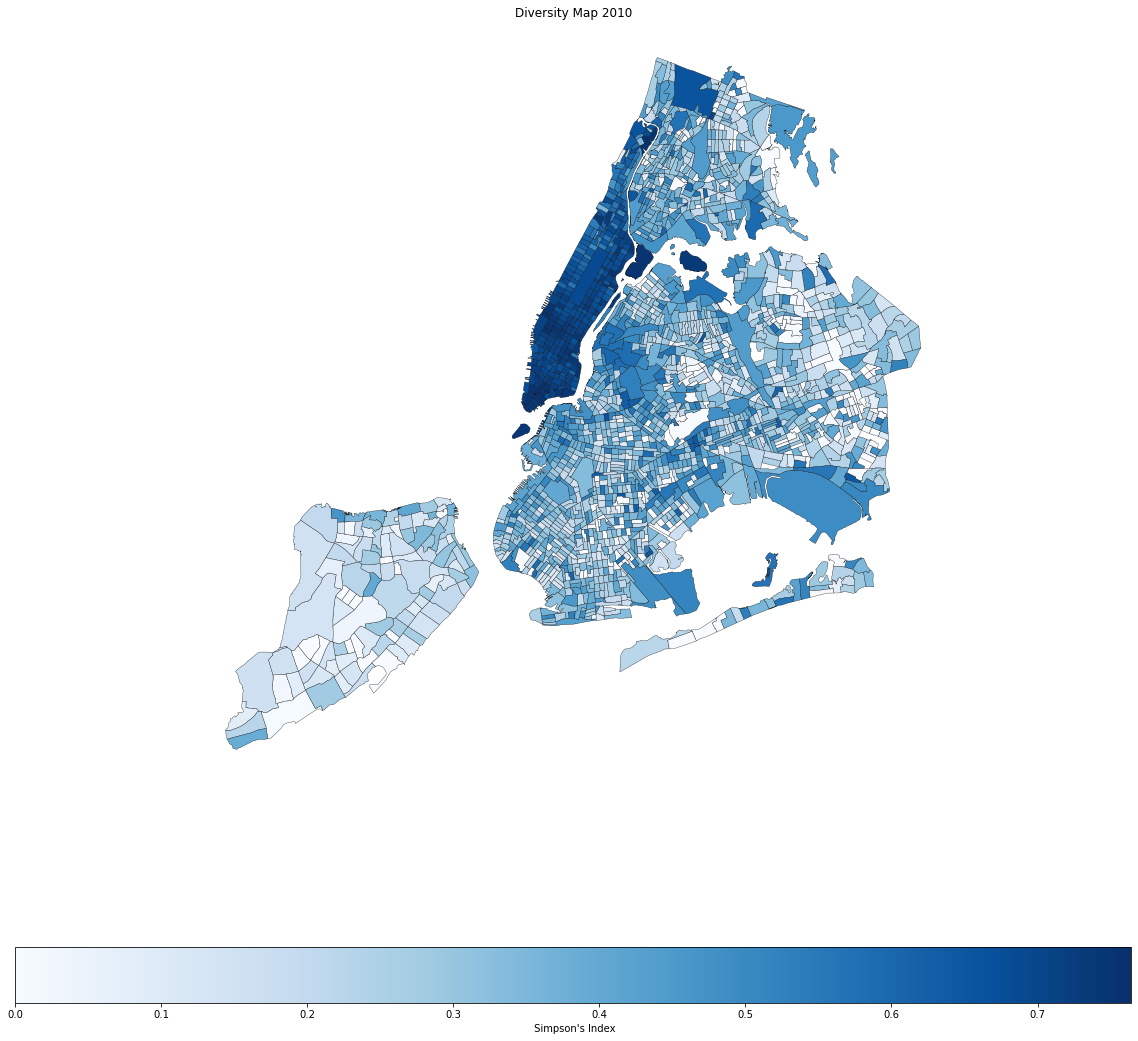

In [14]:
#5 PLOT

Diversity_Map_2010 = d_2010_filtered.plot(column = 'Simpsons_index', 
                 cmap = 'Blues', edgecolor = "black", linewidth=0.3,
                 legend = True, figsize = (20,20),
                 legend_kwds={'label': " Simpson's Index",
                        'orientation': "horizontal"},
                       )


#TITLE

Diversity_Map_2010.set(title='Diversity Map 2010')

#Turning of the axis
Diversity_Map_2010.set_axis_off();
